# Generator of Discrete Random Variable with Mersenne Twister

In [94]:
import numpy as np
from RNG_Uniform import *

In [95]:
MT=MT19937()
MT.seed(3213)

In [96]:
def Expectation(Xn):
    return sum(Xn)/len(Xn)

def Variance(Xn):
    exp=Expectation(Xn)
    var=0
    for i in range(len(Xn)):
        var += pow((Xn[i]-exp),2)
    return(var/len(Xn))

## Uniform Discrete

In [172]:
def Uniform_Discrete(a,b,size=1):
    '''
    Give a random number between a and b with uniform probability
    '''
    if size==1:
        U = MT.uniform()
        return a + int( U * (b-a+1))
    res = []
    for i in range(size):
        U = MT.uniform()
        res.append(a + int( U * (b-a+1)))
    return res
        

Expectation : 0.0113
Variance : 9.967572310000184


(array([908., 905., 916., 873., 886., 939., 922., 924., 925., 902., 900.]),
 array([-5.        , -4.09090909, -3.18181818, -2.27272727, -1.36363636,
        -0.45454545,  0.45454545,  1.36363636,  2.27272727,  3.18181818,
         4.09090909,  5.        ]),
 <a list of 11 Patch objects>)

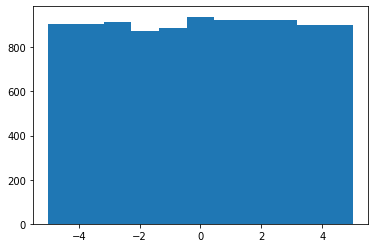

In [179]:
Sn = Uniform_Discrete(-5,5,10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn,bins=11)

## Bernouilli

In [62]:
def Bernouilli(p,size=1):
    if size==1:
        U = MT.uniform()
        if (U<1-p):
            return 0
        else:
            return 1
    res=[]
    for i in range(size):
        U = MT.uniform()
        if (U<1-p):
            res.append(0)
        else:
            res.append(1)
    return res

Expectation : 0.29929
Variance : 0.2097154959001368
0.21


(array([70071.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 29929.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

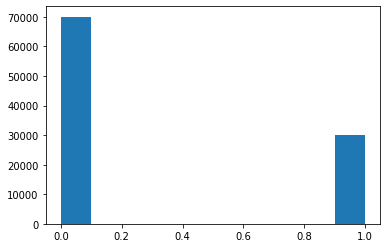

In [60]:
size = 100000
Sn=Bernouilli(0.3,size)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
print(0.3*0.7)
plt.hist(Sn)

## Binomial

In [194]:
def Binomial(n,p,size=1):
    if size == 1 :
        return(sum(Bernouilli(p,n)))
    res = []
    for i in range(size):
        res.append(sum(Bernouilli(p,int(n))))
    return res
        

Expectation : 2.99842
Variance : 2.094237503599901


(array([2.8420e+03, 1.2117e+04, 2.3277e+04, 2.6651e+04, 2.0247e+04,
        1.0196e+04, 3.6380e+03, 8.5000e+02, 1.6700e+02, 1.5000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

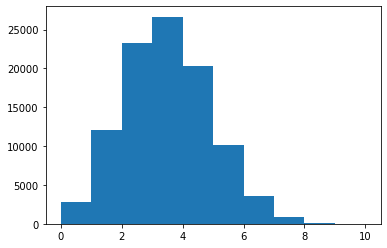

In [195]:
Sn = Binomial(10,0.3,size=100000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn)

## Geometric


In [196]:
def Geometric(p,size=1):
    if size==1:
        res = 1
        U = MT.uniform()
        while (U>p):
            U = MT.uniform()
            res +=1
        return res
    res = []
    for i in range(n):
        U = MT.uniform()
        res_tmp = 1
        while (U>p):
            U = MT.uniform()
            res_tmp +=1
        res.append(res_tmp)
    return res

Expectation : 2.03
Variance : 2.178100000000005


(array([1.492e+03, 2.300e+02, 1.370e+02, 6.500e+01, 3.700e+01, 2.100e+01,
        1.000e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

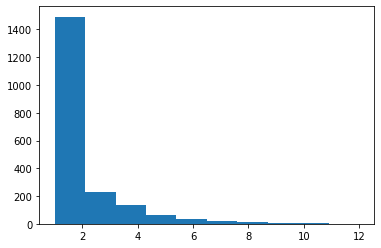

In [197]:
Sn = Geometric(0.5,size=10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn)

## Poisson

Simultion method using the Th. : $(X_n)$ is an i.i.d. sequence of exponential law of parameters $\lambda$ then for $S_n = \sum_{i=1}^n X_n$ $\forall n \in \mathbb{N}, \mathbb{P}(S_n \le 1 \le S_{n+1})=\frac{\lambda^k}{k!}e^{-k}$ 
$\textit{Looking for Proof}$

In [237]:
def Poisson(lambdaa,size=1):
    if size==1:
        k=0
        p=1
        while (p > np.exp(-lambdaa)):
            U = MT.uniform()
            p = p*u
            k +=1
        return (k-1)
    res = []
    for i in range(size):
        k=0
        p=1
        cond = np.exp(-lambdaa)
        while (p > cond):
            U = MT.uniform()
            p = p*U
            k +=1
        res.append(k-1)
    return res

Expectation : 5.0029
Variance : 5.038091589999929


(array([4.020e+02, 2.244e+03, 1.768e+03, 3.215e+03, 1.000e+03, 1.048e+03,
        2.710e+02, 3.700e+01, 1.400e+01, 1.000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

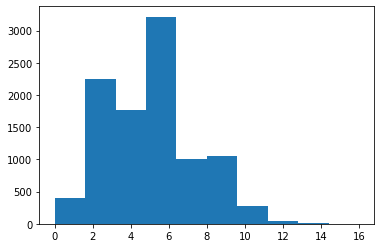

In [239]:
Sn = Poisson(5,size=10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn)

Another simulation method using the fact that the Poisson law is the limit of a Binomial($n$,$p_n$) with $p_n = \frac{\lambda}{n}$.
A minimal condition is $\lambda <10$

In [204]:
def Poisson_2(lambdaa,size=1):
    n = 100.0
    p = lambdaa/n
    if size==1:
        return Binomial(n,p,1)
    return Binomial(n,p,size)

Expectation : 4.0307
Variance : 3.820957510000061


(array([ 826., 1414., 1994., 3621., 1067.,  575.,  437.,   41.,   19.,
           6.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

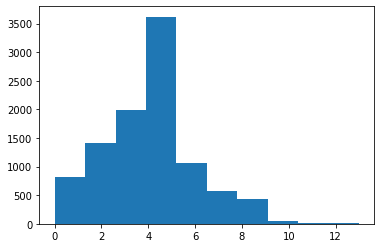

In [207]:
Sn = Poisson_2(4,size=10000)
print("Expectation :",Expectation(Sn))
print("Variance :",Variance(Sn))
plt.hist(Sn)